In [1]:
import phoebe
from phoebe import u,c

import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='WARNING')

/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


A contact binary Bundle is created by passing contact_binary=True to the default binary bundle.

In [2]:
cb = phoebe.default_binary(contact_binary = True)

The main difference between the detached and contact binary Bundles comes in the hierarchy of the system. In addition to the two star components, contact binaries have an envelope component as well.

In [3]:
print cb.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



The envelope component stores parameters that pertain to the overall system and are in principle shared by the two stars or equal.

In [4]:
print cb.filter(component='contact_envelope', kind='envelope', context='component')

ParameterSet: 4 parameters
  abun@contact_envelope@compo...: 0.0
  pot@contact_envelope@component: 3.5
  ld_func_bol@contact_envelop...: logarithmic
  ld_coeffs_bol@contact_envel...: [0.5 0.5]


The star components hold parameters that can still be attributed to the indivudal stars in the contact binary:

In [5]:
print cb.filter(component='primary', kind = 'star', context='component')

ParameterSet: 6 parameters
          teff@primary@component: 6000.0 K
     gravb_bol@primary@component: 0.32
  irrad_frac_refl_bol@primary...: 0.6
* irrad_frac_lost_bol@primary...: 0.4
*         mass@primary@component: 0.998813135806 solMass
*          sma@primary@component: 2.65 solRad


In [6]:
cb.add_dataset('mesh', times=[0.25], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [7]:
cb.add_dataset('lc', times=np.linspace(0.,1.,50), dataset='lc01')

<ParameterSet: 16 parameters | contexts: compute, dataset>

In [8]:
cb.run_compute()

<ParameterSet: 41 parameters | kinds: mesh, lc>

([<matplotlib.axes._subplots.AxesSubplot at 0x104ae7850>],
 [<matplotlib.collections.PolyCollection at 0x104a96050>])

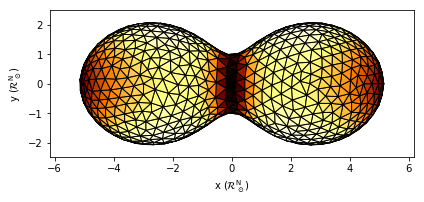

In [9]:
cb.plot('mesh01', facecolor='teffs')

([<matplotlib.axes._subplots.AxesSubplot at 0x10aa561d0>],
 [<matplotlib.lines.Line2D at 0x10aa042d0>])

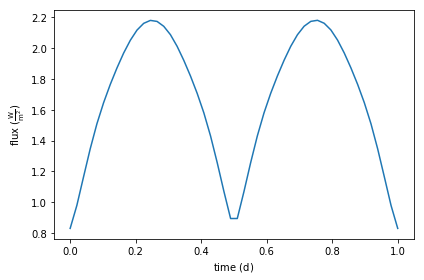

In [10]:
cb.plot('lc01')

In [11]:
cb['teff@primary'] = 8000.

Wed, 06 Jun 2018 10:00 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=8000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32


In [12]:
cb.run_compute()

Wed, 06 Jun 2018 10:00 BUNDLE       WARNING overwriting model: latest
Wed, 06 Jun 2018 10:00 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32


<ParameterSet: 41 parameters | kinds: mesh, lc>

([<matplotlib.axes._subplots.AxesSubplot at 0x10ab70d90>],
 [<matplotlib.collections.PolyCollection at 0x104abec50>])

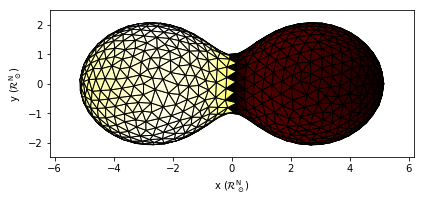

In [13]:
cb.plot('mesh01', facecolor='teffs')

([<matplotlib.axes._subplots.AxesSubplot at 0x10ad56cd0>],
 [<matplotlib.lines.Line2D at 0x10aa56c10>])

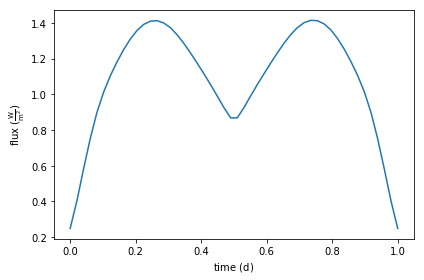

In [14]:
cb.plot('lc01')

In [15]:
def pot_to_ff(cb):
    crit_pots = cb.compute_critical_pots('contact_envelope')
    L1, L2 = crit_pots['L1'], np.max((crit_pots['L2'], crit_pots['L3']))
    return (cb['pot@contact_envelope'] - L1)/(L2-L1)

In [16]:
def ff_to_pot(cb, FF):
    crit_pots = cb.compute_critical_pots('contact_envelope')
    L1, L2 = crit_pots['L1'], np.max((crit_pots['L2'], crit_pots['L3']))
    return L1 + FF*(L2-L1)

In [17]:
ff = 0.08
q = 0.2
cb['q'] = q
cb['pot@contact_envelope@component'] = ff_to_pot(cb, ff)

Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING contact_envelope is not overflowing L1 at apastron
Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING contact_envelope is not overflowing L1 at apastron
Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING contact_envelope is not overflowing L1 at apastron
Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING contact_envelope is not overflowing L1 at apastron
Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING contact_envelope is not overflowing L1 at apastron
Wed, 06 Jun 2018 10:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=8000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32


In [18]:
cb.run_compute()

Wed, 06 Jun 2018 10:03 BUNDLE       WARNING overwriting model: latest
Wed, 06 Jun 2018 10:03 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32


<ParameterSet: 41 parameters | kinds: mesh, lc>

([<matplotlib.axes._subplots.AxesSubplot at 0x10aef7fd0>],
 [<matplotlib.collections.PolyCollection at 0x104f54850>])

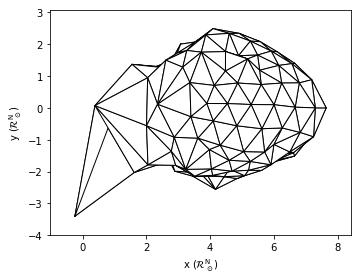

In [19]:
cb.plot('mesh01')

### Exercises

1. Find the lowest (to +/- 0.05) value of the fillout parameter that produces a reasonable mesh for the above system.

2. Plot the surface temperatures of the contact envelope as a function of the mesh $x$ coordinates.